## Perceptron for Binary Classification (Iris Dataset)

### Author: Aryan Singh Sisodia | Objective: Implement and analyze Perceptron algorithm for binary classification


### 1. Setup and Data Loading

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets

data = X.copy()
data['target'] = y

data = data[data['target'] != 'Iris-virginica']

data['target'] = data['target'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1
})

print(data.head())

   sepal length  sepal width  petal length  petal width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


### 2. Data Exploration

       sepal length  sepal width  petal length  petal width      target
count    100.000000   100.000000    100.000000   100.000000  100.000000
mean       5.471000     3.094000      2.862000     0.785000    0.500000
std        0.641698     0.476057      1.448565     0.566288    0.502519
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.000000     2.800000      1.500000     0.200000    0.000000
50%        5.400000     3.050000      2.450000     0.800000    0.500000
75%        5.900000     3.400000      4.325000     1.300000    1.000000
max        7.000000     4.400000      5.100000     1.800000    1.000000
target
0    50
1    50
Name: count, dtype: int64


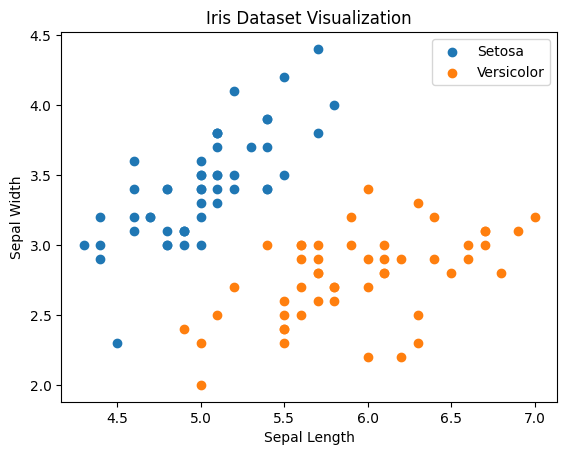

In [19]:
print(data.describe())

print(data['target'].value_counts())

plt.scatter(
    data[data['target'] == 0]['sepal length'],
    data[data['target'] == 0]['sepal width'],
    label='Setosa'
)

plt.scatter(
    data[data['target'] == 1]['sepal length'],
    data[data['target'] == 1]['sepal width'],
    label='Versicolor'
)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Iris Dataset Visualization')
plt.show()


### 3. Data Preprocessing

In [20]:
X = data.drop('target', axis=1).values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Model Training

In [21]:
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)

perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

### 5.A Model Evaluation

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



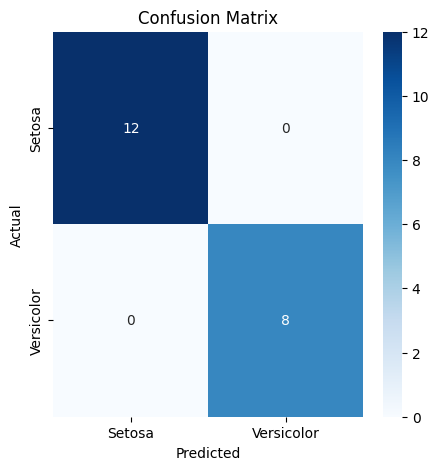

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Setosa', 'Versicolor'],
    yticklabels=['Setosa', 'Versicolor']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 5.B ROC Curve

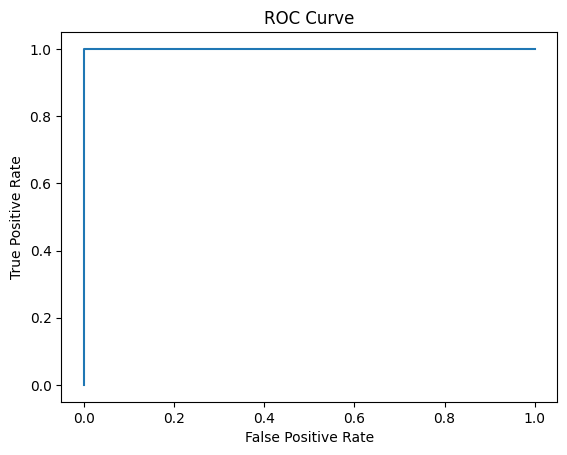

In [23]:
from sklearn.metrics import roc_curve, auc

y_scores = perceptron.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


### Why Perceptron Works Here
The Iris Setosa and Versicolor classes are linearly separable, making them ideal for a linear classifier like Perceptron.


### 6. Model Interpretation & Decision Boundary

In [24]:
X = data[['sepal length', 'sepal width']].values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

print("Model Coefficients:", perceptron.coef_)
print("Model Intercept:", perceptron.intercept_)

Model Coefficients: [[ 0.56214556 -0.35303049]]
Model Intercept: [0.2]


### 7. Exercises

Exercise 1: Train on Different Features

In [25]:
X = data[['petal length', 'petal width']].values

Exercise 2: Hyperparameter Tuning

In [26]:
perceptron = Perceptron(
    max_iter=100,
    eta0=0.01,
    random_state=42
)
